# Predobdelava dokumenta

Prikaz razlike med standardno predobdelavo besedila ter predobdelavo z odstranjevanjem strukturnih delov zakonskih aktov.

In [1]:
from textsemantics.server_api import ServerAPI

Naložimo korpus zakonov s strežnika.

In [2]:
api = ServerAPI()
datasets = api.list_datasets()
laws = datasets[0][0]
metadata = api.get_metadata(laws)
metadata.head()

,Title,Uradni list Issue,Date published,Law text,Date passed,Date valid,Institution accepted,Institution prepared
0,5479. Zakon o spremembah in dopolnitvah Zakona...,106/2010,2010-12-27,http://file.biolab.si/text-semantics/laws/5479...,2010-12-16,2011-01-11,Državni zbor RS,Ministrstvo za notranje zadeve
1,1679. Zakon o spremembah in dopolnitvah Zakona...,39/2006,2006-04-13,http://file.biolab.si/text-semantics/laws/1679...,2006-03-30,2006-04-28,Državni zbor RS,Ministrstvo za notranje zadeve
2,2936. Zakon o spremembah in dopolnitvah Zakona...,67/2019,2019-11-08,http://file.biolab.si/text-semantics/laws/2936...,2019-10-29,2019-11-23,Državni zbor RS,Ministrstvo za finance
3,3886. Zakon o spremembah in dopolnitvah Zakona...,91/2005,2005-10-14,http://file.biolab.si/text-semantics/laws/3886...,2005-09-29,2005-10-29,Državni zbor RS,Ministrstvo za pravosodje
4,625. Zakon o spremembah in dopolnitvah Zakona ...,17/2015,2015-03-13,http://file.biolab.si/text-semantics/laws/625-...,2015-03-04,2015-03-28,Državni zbor RS,Ministrstvo za pravosodje


In [3]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from lemmagen.lemmatizer import Lemmatizer
from lemmagen import DICTIONARY_SLOVENE

def preprocess(doc):
    stop_words = set(stopwords.words('slovene'))
    tokenizer = RegexpTokenizer("\w+")
    lemmatizer = Lemmatizer(dictionary=DICTIONARY_SLOVENE)
    tokens = tokenizer.tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens 
              if token not in stop_words 
              and len(token) > 2 
              and not token.isnumeric()]
    return tokens

In [4]:
from utils import filter_document

In [12]:
original_doc = api.get_text(metadata["Law text"][1])
preprocessed_doc = filter_document.remove_structure(original_doc)

In [13]:
orig_tokens = preprocess(original_doc)
preproc_tokens = preprocess(preprocessed_doc)
print("Originalni dokument")
print(f"\tŠtevilo znakov: {len(original_doc)}")
print(f"\tŠtevilo besed: {len(orig_tokens)}")
print(f"\tŠtevilo unikatnih besed: {len(set(orig_tokens))}\n\n")
print("Predobdelani dokument")
print(f"\tŠtevilo znakov: {len(preprocessed_doc)}")
print(f"\tŠtevilo besed: {len(preproc_tokens)}")
print(f"\tŠtevilo unikatnih besed: {len(set(preproc_tokens))}")

Originalni dokument
	Število znakov: 2795
	Število besed: 224
	Število unikatnih besed: 115


Predobdelani dokument
	Število znakov: 2293
	Število besed: 173
	Število unikatnih besed: 98


In [14]:
dist = nltk.FreqDist(orig_tokens)
common = dist.most_common(10)
print("Najpogostejših 10 besed v originalnem dokumentu:")
for word, count in common: print(f"    {word}: {count}")
print("\n\n")
dist2 = nltk.FreqDist(preproc_tokens)
common2 = dist2.most_common(10)
print("Najpogostejših 10 besed v predobdelanem dokumentu:")
for word, count in common2: print(f"    {word}: {count}")

Najpogostejših 10 besed v originalnem dokumentu:
    člen: 15
    matičen: 9
    odstavek: 8
    register: 8
    zakon: 7
    republika: 6
    slovenija: 6
    istospolen: 6
    partnerski: 6
    skupnost: 6



Najpogostejših 10 besed v predobdelanem dokumentu:
    matičen: 8
    register: 7
    odstavek: 6
    istospolen: 6
    partnerski: 6
    skupnost: 6
    podatek: 5
    zakon: 4
    registracija: 4
    beseda: 4


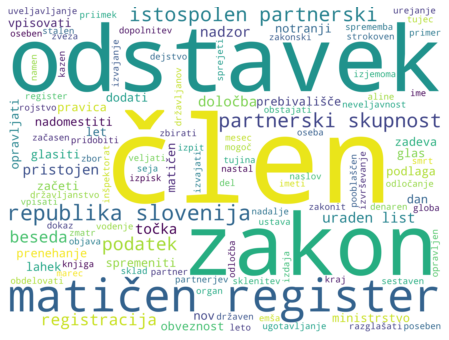

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=4000, height=3000, random_state=0, background_color="white"
).generate(" ".join(orig_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

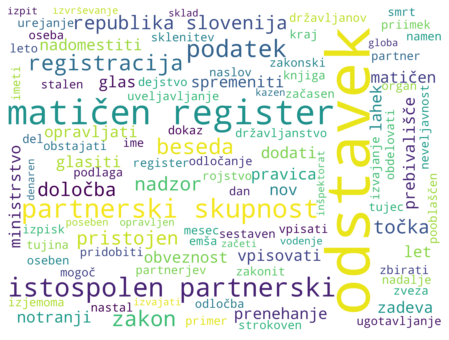

In [17]:
wordcloud = WordCloud(
    width=4000, height=3000, random_state=0, background_color="white"
).generate(" ".join(preproc_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");